In [57]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

input_file = "/Users/szymontrochimiak/Library/CloudStorage/CloudMounter-SzymonTrochimiak/Nauka/PW/MINI/Data Processing in R and Python/Data/cardano.stackexchange.com/Posts.xml"

In [58]:
df_posts = pd.read_xml(input_file)

In [59]:
df_posts

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,...,Tags,AnswerCount,CommentCount,ContentLicense,ClosedDate,ParentId,CommunityOwnedDate,OwnerDisplayName,FavoriteCount,LastEditorDisplayName
0,1,1,12.0,2021-04-27T15:06:44.553,39,1114.0,"<p>As far as I know, the Cardano project was s...",17.0,149.0,2021-04-28T08:29:48.957,...,<proof-of-work><governance><ethereum>,3.0,2,CC BY-SA 4.0,None,NaN,None,None,NaN,None
1,2,1,90.0,2021-04-27T15:11:29.537,29,641.0,"<p>As a developer building an application, wha...",28.0,26.0,2021-04-27T15:23:32.520,...,<api><mainnet><testnet>,3.0,0,CC BY-SA 4.0,None,NaN,None,None,NaN,None
2,3,1,383.0,2021-04-27T15:15:30.833,13,297.0,<p>Being a total noob when it comes to using b...,23.0,26.0,2021-04-27T15:17:23.980,...,<nft><development>,2.0,0,CC BY-SA 4.0,None,NaN,None,None,NaN,None
3,4,1,25.0,2021-04-27T15:15:37.740,14,715.0,<p>As a person who are deciding to buy some AD...,17.0,149.0,2021-05-24T14:44:22.813,...,<ada>,4.0,4,CC BY-SA 4.0,2021-05-05T06:19:21.023,NaN,None,None,NaN,None
4,5,1,9.0,2021-04-27T15:16:45.443,27,1486.0,<p>NFTs are being minted in Cardano even witho...,12.0,26.0,2021-04-27T15:28:22.183,...,<nft>,2.0,3,CC BY-SA 4.0,None,NaN,None,None,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6685,11441,2,NaN,2023-11-30T22:01:20.947,0,NaN,"<p>First off, when analyzing CBOR data, cbor.m...",62.0,NaN,None,...,None,NaN,0,CC BY-SA 4.0,None,11437.0,None,None,NaN,None
6686,11442,1,NaN,2023-12-01T05:03:09.073,0,9.0,<p>I am looking for Cardano DApps which are:</...,7697.0,NaN,None,...,<plutus><decentralized-applications>,1.0,0,CC BY-SA 4.0,None,NaN,None,None,NaN,None
6687,11443,2,NaN,2023-12-01T09:29:20.677,0,NaN,<p>Plutarch team provided two examples for me:...,7697.0,NaN,None,...,None,NaN,0,CC BY-SA 4.0,None,11442.0,None,None,NaN,None
6688,11444,1,NaN,2023-12-01T21:46:52.240,0,8.0,<p>I am trying to build a smart contract that ...,5933.0,NaN,None,...,<smart-contract><oracles><trust><independent-s...,1.0,0,CC BY-SA 4.0,None,NaN,None,None,NaN,None


In [60]:
df_posts["CreationDate"] = pd.to_datetime(df_posts["CreationDate"])
df_posts["LastActivityDate"] = pd.to_datetime(df_posts["LastActivityDate"])
df_posts["LastEditDate"] = pd.to_datetime(df_posts["LastEditDate"])
df_posts["ClosedDate"] = pd.to_datetime(df_posts["ClosedDate"])
df_posts["CommunityOwnedDate"] = pd.to_datetime(df_posts["CommunityOwnedDate"])

In [61]:
cardano_price = "/Users/szymontrochimiak/Documents/gts/dprpy_assignment_3/historical_prices/ADA-USD.csv"
df_cardano = pd.read_csv(cardano_price)
df_cardano["Price"] = (df_cardano["Close"] + df_cardano["Open"]) / 2

In [62]:
df_cardano

,Date,Open,High,Low,Close,Adj Close,Volume,Price
0,2017-11-09,0.025160,0.035060,0.025006,0.032053,0.032053,18716200,0.028606
1,2017-11-10,0.032219,0.033348,0.026451,0.027119,0.027119,6766780,0.029669
2,2017-11-11,0.026891,0.029659,0.025684,0.027437,0.027437,5532220,0.027164
3,2017-11-12,0.027480,0.027952,0.022591,0.023977,0.023977,7280250,0.025729
4,2017-11-13,0.024364,0.026300,0.023495,0.025808,0.025808,4419440,0.025086
...,...,...,...,...,...,...,...,...
2266,2024-01-23,0.478490,0.485338,0.449699,0.476749,0.476749,538390729,0.477619
2267,2024-01-24,0.476763,0.478956,0.464782,0.476296,0.476296,390187602,0.476529
2268,2024-01-25,0.476302,0.483024,0.459863,0.466479,0.466479,340646602,0.471390
2269,2024-01-26,0.466472,0.489616,0.463956,0.485294,0.485294,362190657,0.475883


In [63]:
df_cardano["Date"] = pd.to_datetime(df_cardano["Date"])
df_cardano["Date"] = df_cardano["Date"].dt.tz_localize(None)
df_cardano.index = df_cardano["Date"]
del df_cardano["Date"]

In [64]:
# limit timeframe
df_posts = df_posts[df_posts["CreationDate"] >= datetime.datetime.fromisoformat("2021-06-01")][df_posts["CreationDate"] <= datetime.datetime.fromisoformat("2023-06-01")]
df_cardano = df_cardano[datetime.datetime.fromisoformat("2021-06-01"):datetime.datetime.fromisoformat("2023-06-01")]

/var/folders/v3/x_ps6wr13g52vv22zxx8c_fr0000gn/T/ipykernel_1707/1122408947.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_posts = df_posts[df_posts["CreationDate"] >= datetime.datetime.fromisoformat("2021-06-01")][df_posts["CreationDate"] <= datetime.datetime.fromisoformat("2023-06-01")]


In [65]:
questions = df_posts[df_posts["PostTypeId"]==1]
answers = df_posts[df_posts["PostTypeId"]==2]

## Proportion of answers to questions

<Axes: xlabel='CreationDate'>

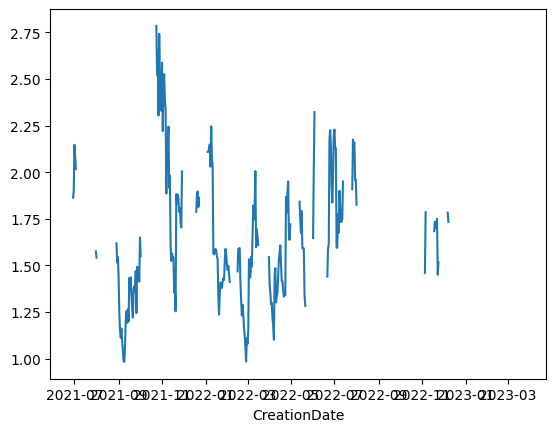

In [66]:
(answers.groupby(df_posts["CreationDate"].dt.date).size() / questions.groupby(df_posts["CreationDate"].dt.date).size()).rolling(window=10).mean().plot()
#answers.groupby(df_posts["CreationDate"].dt.date).size().rolling(window=10).mean().plot()

## posts to cardano

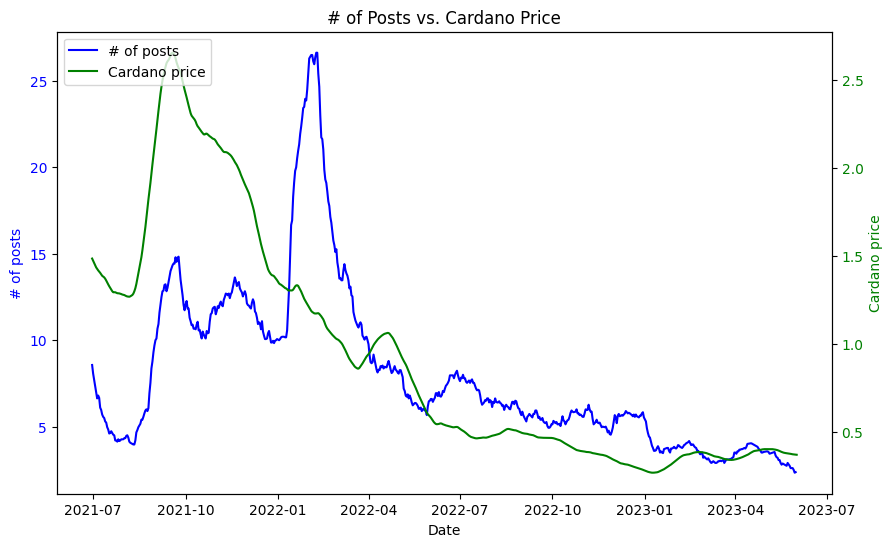

In [67]:
series1 = df_posts.groupby(df_posts["CreationDate"].dt.date).size().rolling(window=30).mean()
series2 = df_cardano["Price"].rolling(window=30).mean()

color_palet = ("blue", "green")
title = '# of Posts vs. Cardano Price'
ax_title = ('# of posts', 'Cardano price')
path = "/Users/szymontrochimiak/Downloads/cardano_price.png"

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot number of posts on primary y-axis
line1, = ax1.plot(series1, color=color_palet[0], label=ax_title[0])
ax1.set_xlabel('Date')
ax1.set_ylabel(ax_title[0], color=color_palet[0])
ax1.tick_params(axis='y', labelcolor=color_palet[0])

# Create a second y-axis for Bitcoin price
ax2 = ax1.twinx()
line2, = ax2.plot(series2, color=color_palet[1], label=ax_title[1])
ax2.set_ylabel(ax_title[1], color=color_palet[1])  
ax2.tick_params(axis='y', labelcolor=color_palet[1])

# Create combined legend
plt.legend([line1, line2], ax_title, loc='upper left')

# Title
plt.title(title)

plt.savefig(path)

# Show plot
plt.show()

<Axes: >

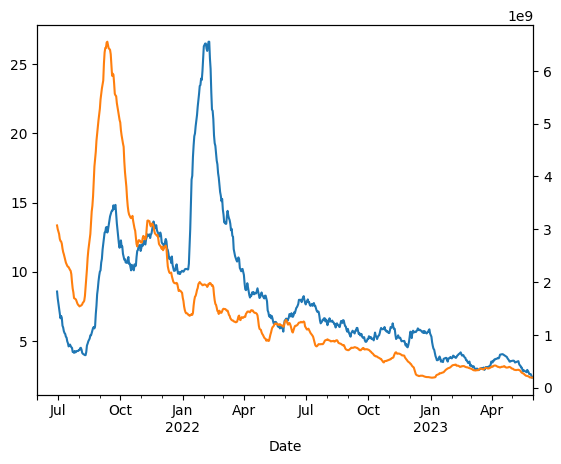

In [68]:
ax = df_posts.groupby(df_posts["CreationDate"].dt.date).size().rolling(window=30).mean().plot()
df_cardano["Volume"].rolling(window=30).mean().plot(ax=ax, secondary_y=True)

## Add column which indicates if post has "buy" and "sell" word

<Axes: xlabel='CreationDate'>

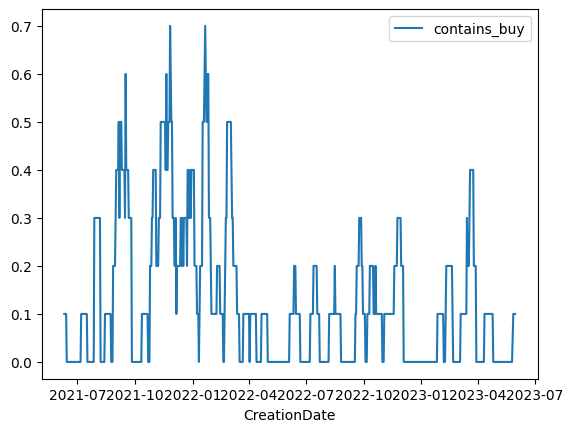

In [69]:
df_posts['contains_buy'] = df_posts['Body'].str.contains('buy', case=False, na=False)
df_posts.groupby(df_posts["CreationDate"].dt.date).agg({'contains_buy': 'sum'}).rolling(window=10).mean().plot()

<Axes: xlabel='CreationDate'>

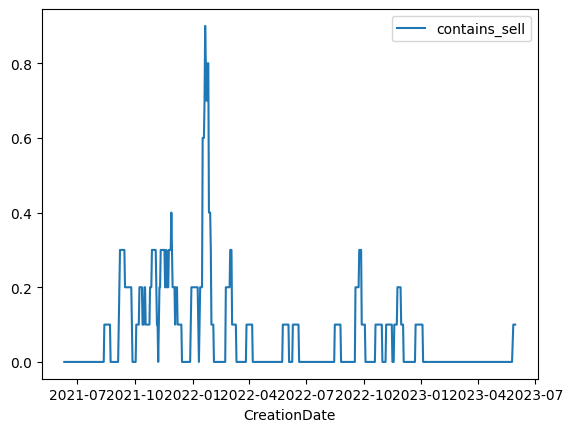

In [70]:
df_posts['contains_sell'] = df_posts['Body'].str.contains('sell', case=False, na=False)
df_posts.groupby(df_posts["CreationDate"].dt.date).agg({'contains_sell': 'sum'}).rolling(window=10).mean().plot()

In [71]:
date_range = pd.date_range(start=datetime.datetime.fromisoformat("2021-06-01"), end=datetime.datetime.fromisoformat("2023-06-01"), freq='D')

buy = df_posts.groupby(df_posts["CreationDate"].dt.date).agg({'contains_buy': 'sum'}).reindex(date_range).fillna(0).replace([np.inf, -np.inf], 0)
sell = df_posts.groupby(df_posts["CreationDate"].dt.date).agg({'contains_sell': 'sum'}).reindex(date_range).fillna(0).replace([np.inf, -np.inf], 0)
all_posts = df_posts.groupby(df_posts["CreationDate"].dt.date).size().reindex(date_range).fillna(0).replace([np.inf, -np.inf], 0)

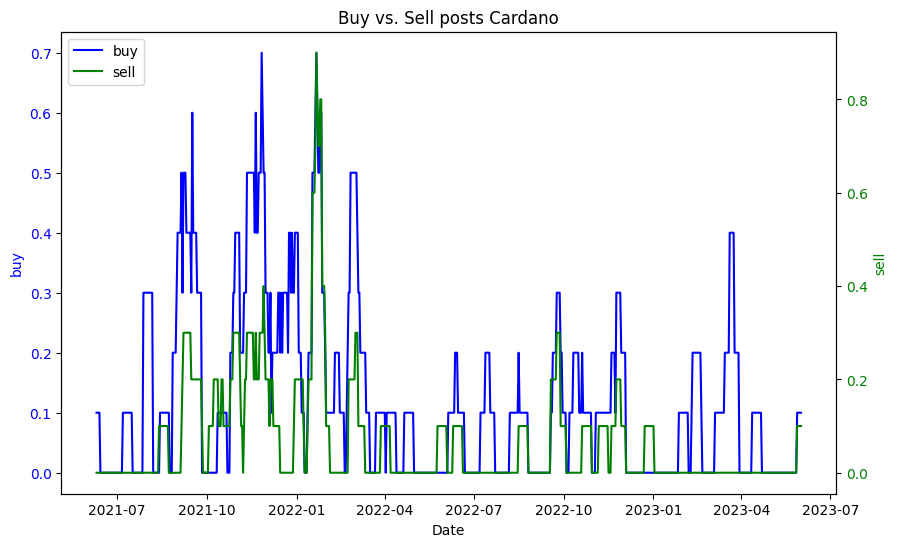

In [72]:
series1 = buy.rolling(window=10).mean()
series2 = sell.rolling(window=10).mean()

color_palet = ("blue", "green")
title = 'Buy vs. Sell posts Cardano'
ax_title = ('buy', 'sell')
path = "/Users/szymontrochimiak/Downloads/cardano_buy_sell.png"

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot number of posts on primary y-axis
line1, = ax1.plot(series1, color=color_palet[0], label=ax_title[0])
ax1.set_xlabel('Date')
ax1.set_ylabel(ax_title[0], color=color_palet[0])
ax1.tick_params(axis='y', labelcolor=color_palet[0])

# Create a second y-axis for Bitcoin price
ax2 = ax1.twinx()
line2, = ax2.plot(series2, color=color_palet[1], label=ax_title[1])
ax2.set_ylabel(ax_title[1], color=color_palet[1])  
ax2.tick_params(axis='y', labelcolor=color_palet[1])

# Create combined legend
plt.legend([line1, line2], ax_title, loc='upper left')

# Title
plt.title(title)

plt.savefig(path)

# Show plot
plt.show()

## Correlations

In [73]:
from scipy.signal import correlate
import matplotlib.pyplot as plt
import numpy as np

def calculate_correlation(signal1, signal2):
    norm_signal1 = (signal1 - np.mean(signal1)) / np.std(signal1)
    norm_signal2 = (signal2 - np.mean(signal2)) / np.std(signal2)
    
    xcorr = correlate(norm_signal1, norm_signal2, mode='full', method='auto') / len(signal1)
    plt.plot(xcorr)
    plt.show()
    
    # The shift is determined by the index of the maximum correlation
    max_corr_index = np.argmax(xcorr)
    shift = max_corr_index - (len(signal1) - 1)
    return shift, np.max(xcorr)

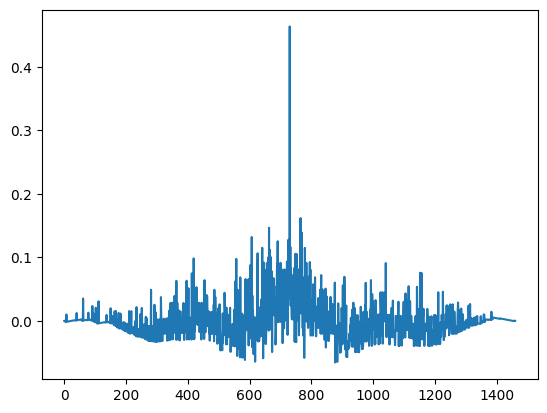

(0, 0.4637316702035529)

In [74]:
calculate_correlation(buy["contains_buy"], sell["contains_sell"])

Ok correlation, but no shift

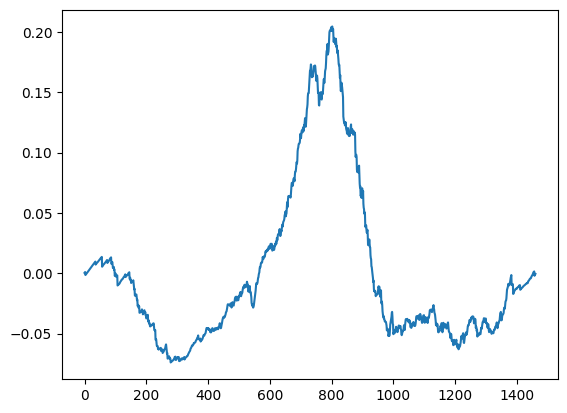

(72, 0.20438854178510746)

In [75]:
calculate_correlation(buy["contains_buy"], df_cardano["Price"])

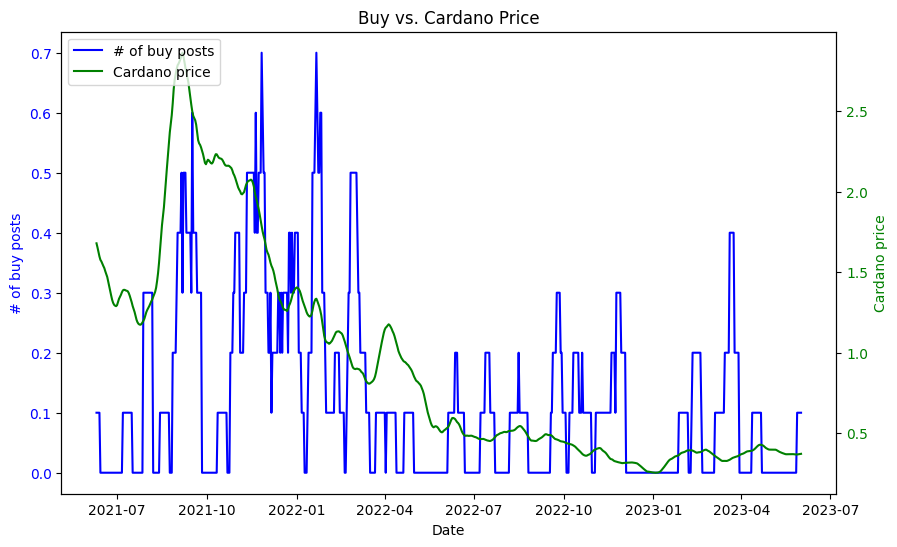

In [77]:
series1 = buy["contains_buy"].rolling(window=10).mean()
series2 = df_cardano["Price"].rolling(window=10).mean()

color_palet = ("blue", "green")
title = 'Buy vs. Cardano Price'
ax_title = ('# of buy posts', 'Cardano price')
path = "/Users/szymontrochimiak/Downloads/cardano_buy_price.png"

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot number of posts on primary y-axis
line1, = ax1.plot(series1, color=color_palet[0], label=ax_title[0])
ax1.set_xlabel('Date')
ax1.set_ylabel(ax_title[0], color=color_palet[0])
ax1.tick_params(axis='y', labelcolor=color_palet[0])

# Create a second y-axis for Bitcoin price
ax2 = ax1.twinx()
line2, = ax2.plot(series2, color=color_palet[1], label=ax_title[1])
ax2.set_ylabel(ax_title[1], color=color_palet[1])  
ax2.tick_params(axis='y', labelcolor=color_palet[1])

# Create combined legend
plt.legend([line1, line2], ax_title, loc='upper left')

# Title
plt.title(title)

plt.savefig(path)

# Show plot
plt.show()

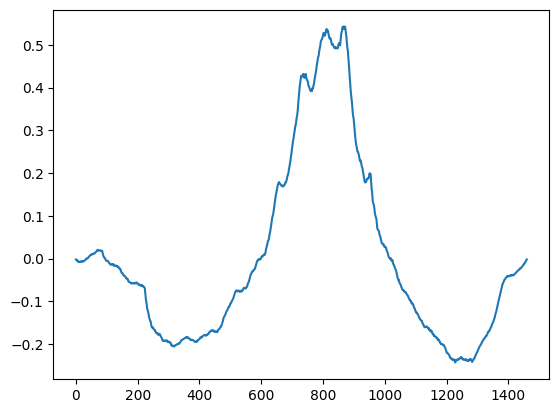

(136, 0.5428604482772413)

In [76]:
calculate_correlation(all_posts, df_cardano["Price"])

Pretty strong correlation but the price preceeeds the posts

<Axes: >

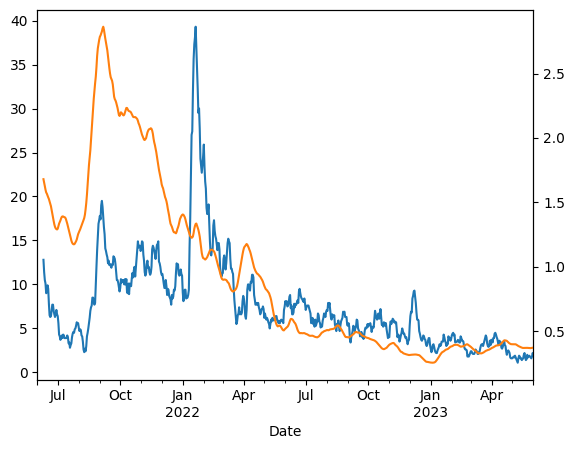

In [78]:
ax = all_posts.rolling(window=10).mean().plot()
df_cardano["Price"].rolling(window=10).mean().plot(ax=ax, secondary_y=True)

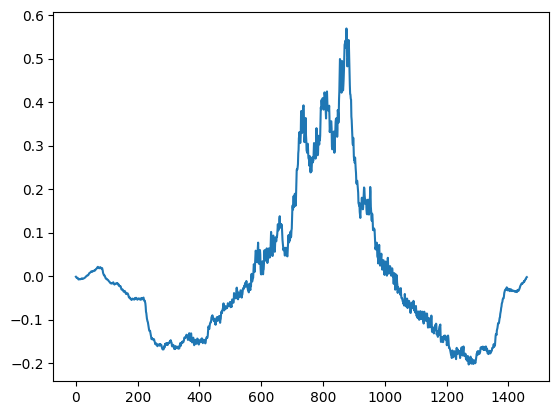

(146, 0.5693780585756042)

In [79]:
calculate_correlation(all_posts, df_cardano["Volume"])

## Correlation of buy-sell with bitcoin price

<Axes: >

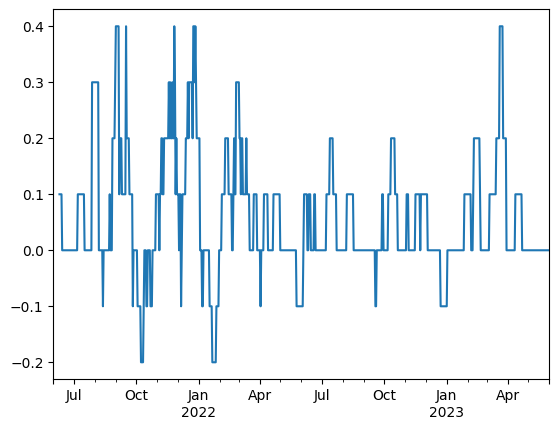

In [80]:
(buy["contains_buy"]-sell["contains_sell"]).rolling(window=10).mean().plot()

/var/folders/v3/x_ps6wr13g52vv22zxx8c_fr0000gn/T/ipykernel_1707/3247095549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cardano["price_diff"] = (df_cardano["Price"].diff() / df_cardano["Price"]).fillna(0)


<Axes: xlabel='Date'>

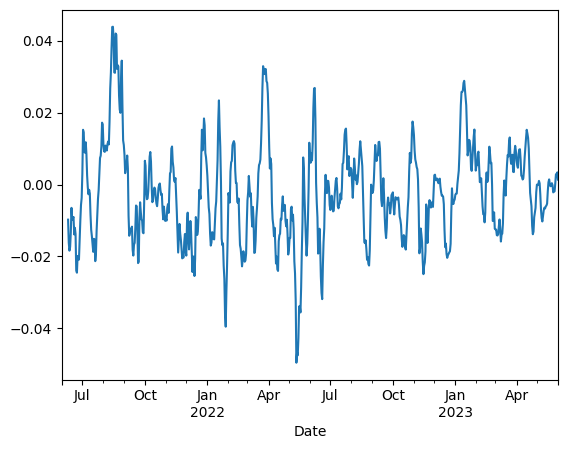

In [81]:
# calculate difference in bitcoin price and normalize based on day price
df_cardano["price_diff"] = (df_cardano["Price"].diff() / df_cardano["Price"]).fillna(0)
df_cardano["price_diff"].rolling(window=10).mean().plot()

In [82]:
len((buy["contains_buy"]-sell["contains_sell"])), len(df_cardano["price_diff"])

(731, 731)

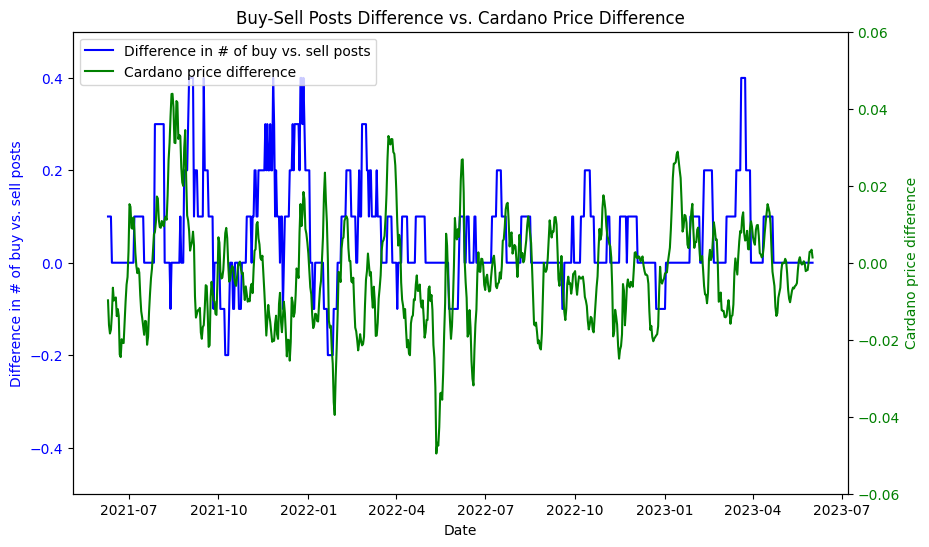

In [88]:
series1 = (buy["contains_buy"]-sell["contains_sell"]).rolling(window=10).mean()
series2 = df_cardano["price_diff"].rolling(window=10).mean()

color_palet = ("blue", "green")
title = 'Buy-Sell Posts Difference vs. Cardano Price Difference'
ax_title = ('Difference in # of buy vs. sell posts', 'Cardano price difference')
path = "/Users/szymontrochimiak/Downloads/cardano_buy_sell_price_diff.png"

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot number of posts on primary y-axis
line1, = ax1.plot(series1, color=color_palet[0], label=ax_title[0])
ax1.set_xlabel('Date')
ax1.set_ylim([-0.5, 0.5])
ax1.set_ylabel(ax_title[0], color=color_palet[0])
ax1.tick_params(axis='y', labelcolor=color_palet[0])

# Create a second y-axis for Bitcoin price
ax2 = ax1.twinx()
line2, = ax2.plot(series2, color=color_palet[1], label=ax_title[1])
ax2.set_ylim([-0.06, 0.06])
ax2.set_ylabel(ax_title[1], color=color_palet[1])  
ax2.tick_params(axis='y', labelcolor=color_palet[1])

# Create combined legend
plt.legend([line1, line2], ax_title, loc='upper left')

# Title
plt.title(title)

plt.savefig(path)

# Show plot
plt.show()

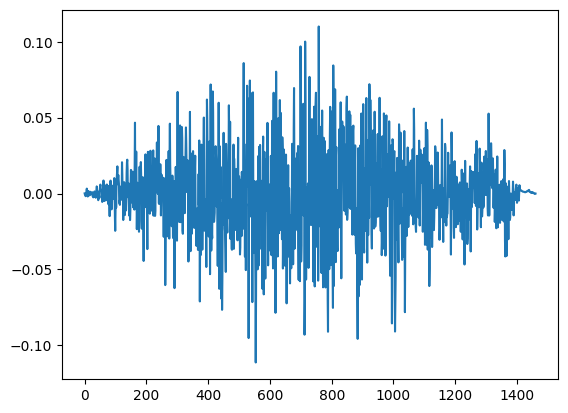

(28, 0.11006301174533438)

In [89]:
calculate_correlation(buy["contains_buy"] - sell["contains_sell"], df_cardano["price_diff"])

### Get only gaining days

In [90]:
# select only gaining days, the rest set to 0
df_bitcoin_gaining = df_cardano.copy()
df_bitcoin_gaining[df_bitcoin_gaining["price_diff"] < 0] = 0
df_bitcoin_gaining

,Open,High,Low,Close,Adj Close,Volume,Price,price_diff
Date,,,,,,,,
2021-06-01,1.738447,1.779591,1.660549,1.734753,1.734753,4123980990,1.736600,0.000000
2021-06-02,1.736103,1.803849,1.719255,1.752824,1.752824,3453620094,1.744463,0.004508
2021-06-03,1.754643,1.888650,1.717762,1.840471,1.840471,3443770332,1.797557,0.029536
2021-06-04,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
2021-06-05,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2023-05-28,0.366780,0.383745,0.366489,0.382999,0.382999,223363707,0.374889,0.026851
2023-05-29,0.383026,0.385947,0.376368,0.379138,0.379138,190025476,0.381082,0.016250
2023-05-30,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000


<Axes: >

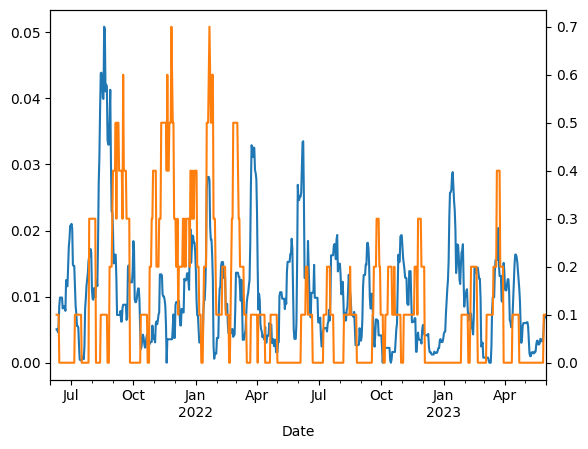

In [91]:
ax = df_bitcoin_gaining["price_diff"].rolling(window=10).mean().plot()
buy["contains_buy"].rolling(window=10).mean().plot(ax=ax, secondary_y=True)

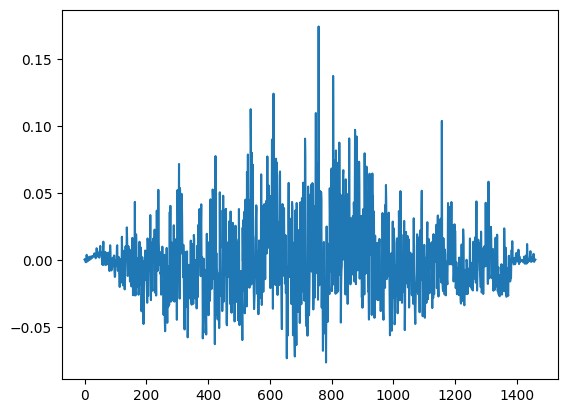

(28, 0.17422766968029668)

In [92]:
calculate_correlation(buy["contains_buy"], df_bitcoin_gaining["price_diff"])

Pretty weak correlation

### Get only loosing days

In [93]:
# select only gaining days, the rest set to 0
df_bitcoin_loosing = df_cardano.copy()
df_bitcoin_loosing[df_bitcoin_loosing["price_diff"] > 0] = 0
df_bitcoin_loosing["price_diff"] *= -1
df_bitcoin_loosing

,Open,High,Low,Close,Adj Close,Volume,Price,price_diff
Date,,,,,,,,
2021-06-01,1.738447,1.779591,1.660549,1.734753,1.734753,4123980990,1.736600,-0.000000
2021-06-02,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,-0.000000
2021-06-03,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,-0.000000
2021-06-04,1.846715,1.848485,1.609734,1.710908,1.710908,4583062567,1.778812,0.010538
2021-06-05,1.709916,1.783177,1.611715,1.659009,1.659009,2969362191,1.684462,0.056011
...,...,...,...,...,...,...,...,...
2023-05-28,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,-0.000000
2023-05-29,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,-0.000000
2023-05-30,0.379129,0.383068,0.375512,0.377934,0.377934,186645169,0.378532,0.006738


<Axes: >

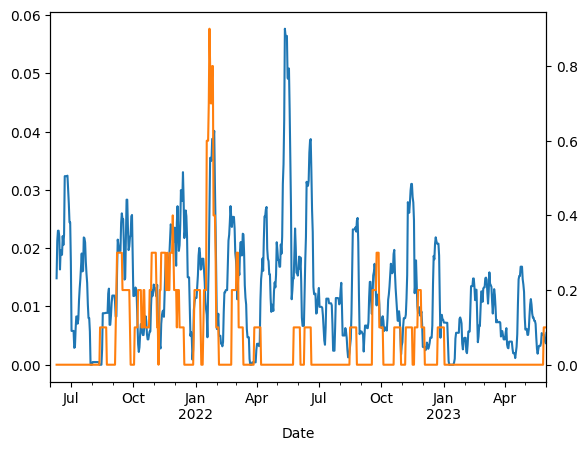

In [94]:
ax = df_bitcoin_loosing["price_diff"].rolling(window=10).mean().plot()
sell["contains_sell"].rolling(window=10).mean().plot(ax=ax, secondary_y=True)

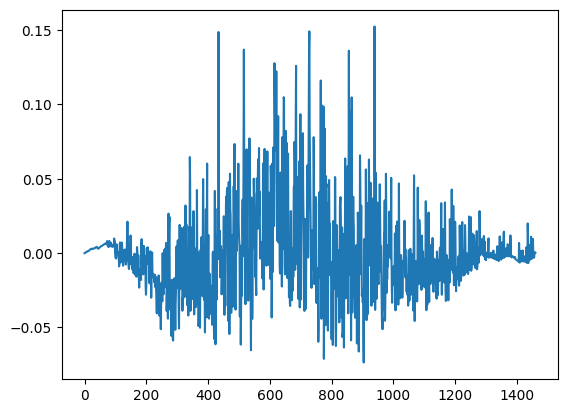

(209, 0.15244460538091803)

In [95]:
calculate_correlation(sell["contains_sell"], df_bitcoin_loosing["price_diff"])

Pretty weak correlation

## Volume correlation

<Axes: xlabel='Date'>

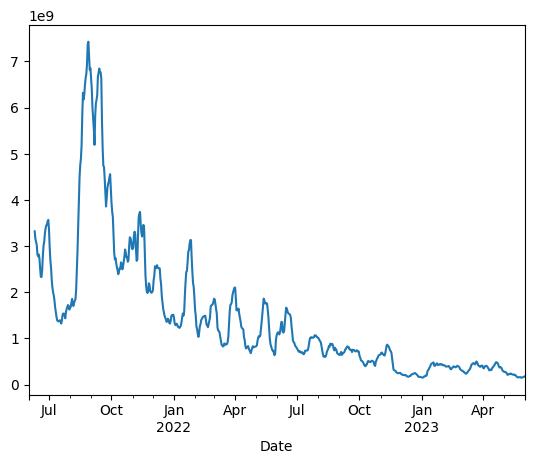

In [96]:
df_cardano["Volume"].rolling(window=10).mean().plot()

/var/folders/v3/x_ps6wr13g52vv22zxx8c_fr0000gn/T/ipykernel_1707/1767983531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cardano["volume_diff"] = (df_cardano["Volume"].diff() / df_cardano["Volume"]).fillna(0).replace([np.inf, -np.inf], 0)


<Axes: xlabel='Date'>

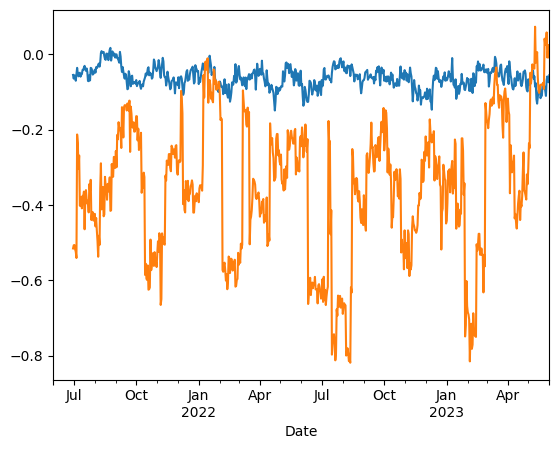

In [97]:
df_cardano["volume_diff"] = (df_cardano["Volume"].diff() / df_cardano["Volume"]).fillna(0).replace([np.inf, -np.inf], 0)
ax = df_cardano["volume_diff"].rolling(window=30).mean().plot()

all_posts_diff = (all_posts.diff() / all_posts).fillna(0).replace([np.inf, -np.inf], 0)
all_posts_diff.rolling(window=30).mean().plot(ax=ax)

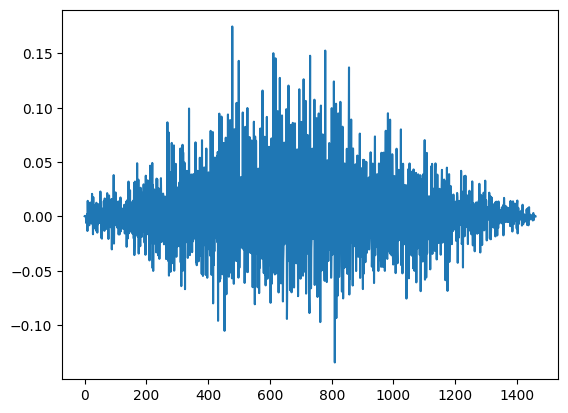

(-252, 0.17469477761496693)

In [98]:
calculate_correlation(all_posts_diff, df_cardano["volume_diff"])

Very weak correlation

## Examine only small part

In [99]:
start_date = datetime.date.fromisoformat("2021-06-01")
end_date = datetime.date.fromisoformat("2022-01-01")
buy.loc[start_date:end_date]

,contains_buy
2021-06-01,0.0
2021-06-02,0.0
2021-06-03,0.0
2021-06-04,1.0
2021-06-05,0.0
...,...
2021-12-28,0.0
2021-12-29,0.0
2021-12-30,1.0
2021-12-31,0.0


<Axes: >

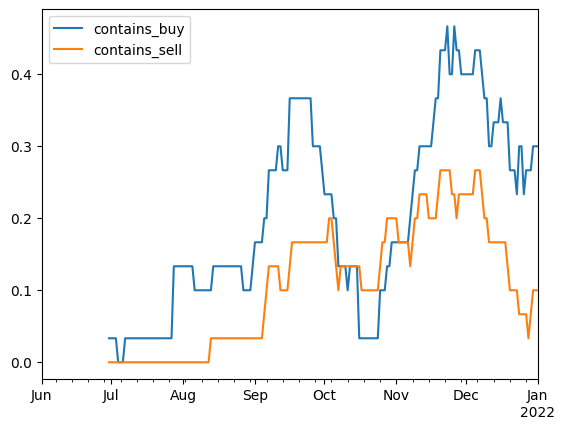

In [100]:
ax = buy.loc[start_date:end_date].rolling(window=30).mean().plot()
sell.loc[start_date:end_date].rolling(window=30).mean().plot(ax=ax)

<Axes: >

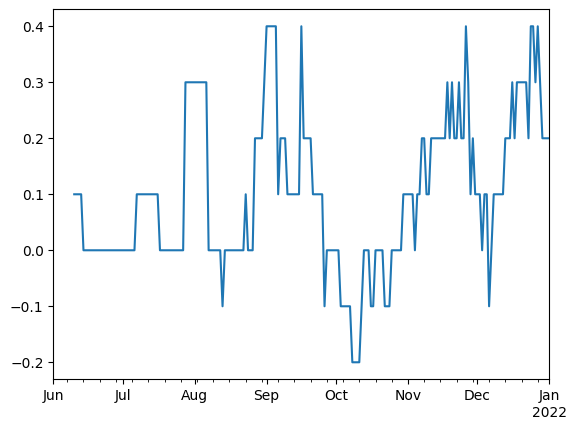

In [101]:
(buy["contains_buy"]-sell["contains_sell"])[start_date:end_date].rolling(window=10).mean().plot()

<Axes: xlabel='Date'>

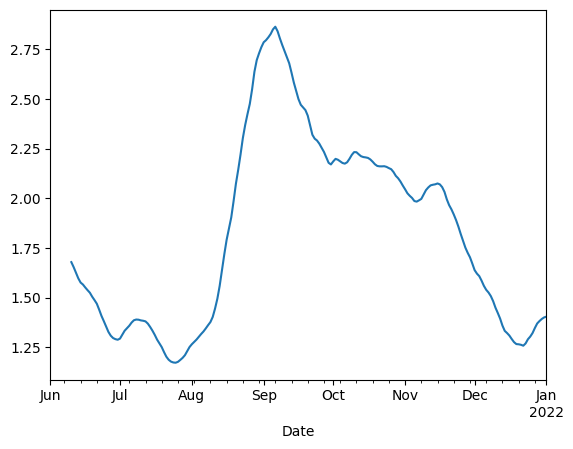

In [102]:
df_cardano.loc[start_date:end_date]["Price"].rolling(window=10).mean().plot()

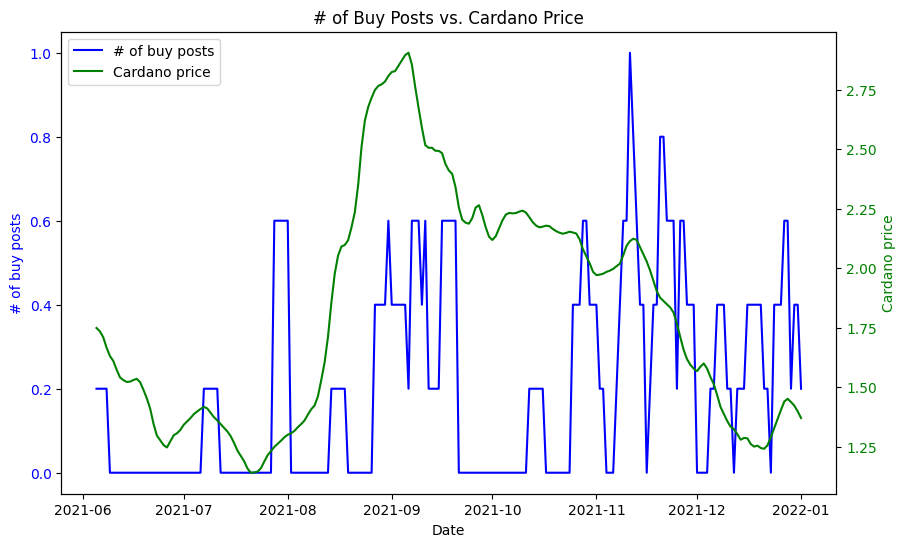

In [104]:
series1 = buy.loc[start_date:end_date]["contains_buy"].rolling(window=5).mean()
series2 = df_cardano.loc[start_date:end_date]["Price"].rolling(window=5).mean()

color_palet = ("blue", "green")
title = '# of Buy Posts vs. Cardano Price'
ax_title = ('# of buy posts', 'Cardano price')
path = "/Users/szymontrochimiak/Downloads/cardano_buy_price_small.png"

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot number of posts on primary y-axis
line1, = ax1.plot(series1, color=color_palet[0], label=ax_title[0])
ax1.set_xlabel('Date')
ax1.set_ylabel(ax_title[0], color=color_palet[0])
ax1.tick_params(axis='y', labelcolor=color_palet[0])

# Create a second y-axis for Bitcoin price
ax2 = ax1.twinx()
line2, = ax2.plot(series2, color=color_palet[1], label=ax_title[1])
ax2.set_ylabel(ax_title[1], color=color_palet[1])  
ax2.tick_params(axis='y', labelcolor=color_palet[1])

# Create combined legend
plt.legend([line1, line2], ax_title, loc='upper left')

# Title
plt.title(title)

plt.savefig(path)

# Show plot
plt.show()

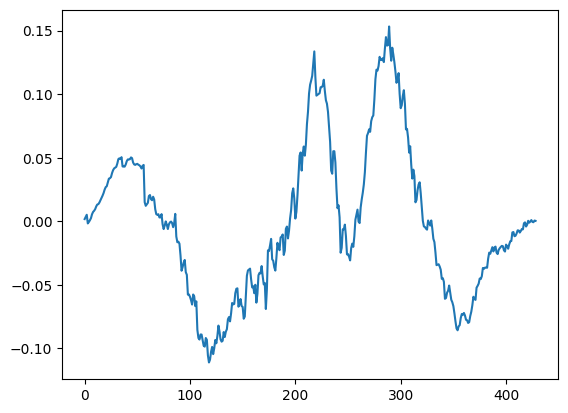

(75, 0.15327508210303173)

In [105]:
calculate_correlation(buy.loc[start_date:end_date]["contains_buy"], df_cardano.loc[start_date:end_date]["Price"])

bad correlation

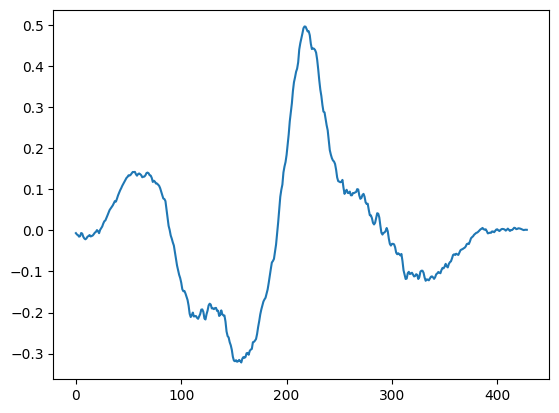

(3, 0.49580712199338967)

In [52]:
calculate_correlation(all_posts.loc[start_date:end_date], df_cardano.loc[start_date:end_date]["Price"])

Good but price preceeds posts

<Axes: >

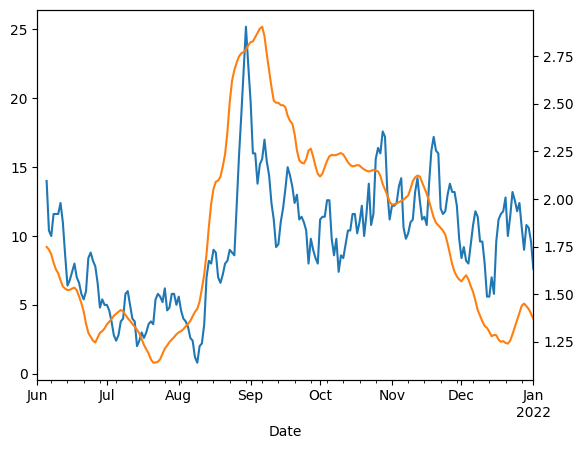

In [53]:
ax = all_posts.loc[start_date:end_date].rolling(window=5).mean().plot()
df_cardano.loc[start_date:end_date]["Price"].rolling(window=5).mean().plot(ax=ax, secondary_y=True)

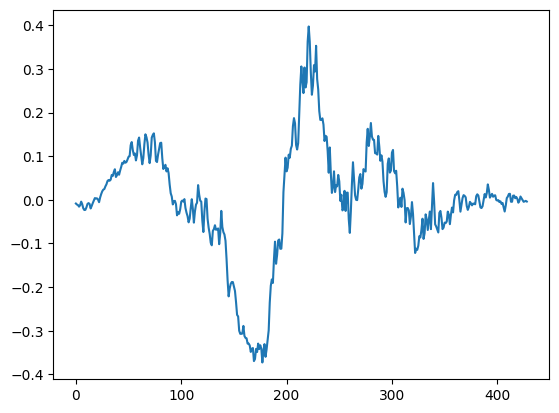

(7, 0.39763215089496073)

In [54]:
calculate_correlation(all_posts.loc[start_date:end_date], df_cardano.loc[start_date:end_date]["Volume"])

<Axes: >

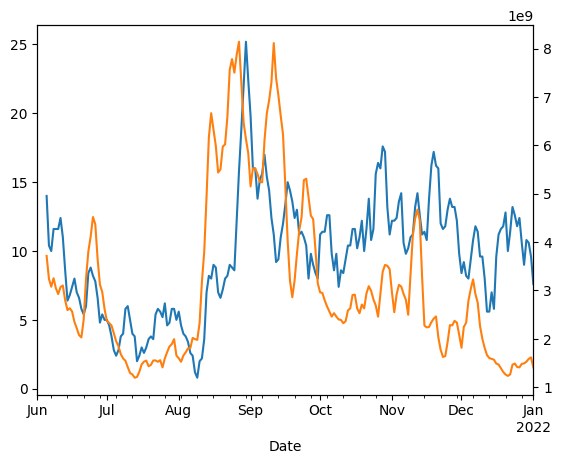

In [55]:
ax = all_posts.loc[start_date:end_date].rolling(window=5).mean().plot()
df_cardano.loc[start_date:end_date]["Volume"].rolling(window=5).mean().plot(ax=ax, secondary_y=True)